In [54]:
import cv2
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")
import mediapipe as mp
import numpy as np
import imutils
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
from PIL import Image

import re
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


import dlib
import cv2
import os
from os import listdir
from os.path import isfile, join

from imgaug import augmenters as iaa
import random

from matplotlib import pyplot as plt
import seaborn as sbn


In [55]:
def convert_webp_to_jpg(path_of_image):
    img = Image.open(path_of_image).convert('RGB')
    path_to_safe = re.sub(r'\.webp', '.jpg', path_of_image)
    #print(path_to_safe)
    path_to_safe = re.sub(r'\/webp', '/jpg', path_to_safe)
    #print(path_to_safe)
    img.save(path_to_safe)
    return path_to_safe

def make_four_out_of_one(path_of_image):
    img = cv2.imread(path_of_image)
    path_to_safe = 'Data/raw/cropped_to_four/'
    file_name = re.sub(r'^Data\/raw\/jpg\/', '', path_of_image)
    path_to_safe = path_to_safe + file_name
    ##########################################
    # At first vertical devide image         #
    ##########################################
    
    # start vertical devide image
    height = img.shape[0]
    width = img.shape[1]
    
    # Cut the image in half
    width_cutoff = width // 2
    left1 = img[:, :width_cutoff]
    right1 = img[:, width_cutoff:]
    # finish vertical devide image
    
    
    ##########################################
    # At first Horizontal devide left1 image #
    ##########################################
    
    #rotate image LEFT1 to 90 CLOCKWISE
    img = cv2.rotate(left1, cv2.ROTATE_90_CLOCKWISE)
    
    # start vertical devide image
    height = img.shape[0]
    width = img.shape[1]
    
    # Cut the image in half
    width_cutoff = width // 2
    l1 = img[:, :width_cutoff]
    l2 = img[:, width_cutoff:]
    # finish vertical devide image
    
    #rotate image to 90 COUNTERCLOCKWISE
    l1 = cv2.rotate(l1, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #rotate image to 90 COUNTERCLOCKWISE
    l2 = cv2.rotate(l2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    
    ##########################################
    # At first Horizontal devide left1 image #
    ##########################################
    
    #rotate image LEFT1 to 90 CLOCKWISE
    img = cv2.rotate(left1, cv2.ROTATE_90_CLOCKWISE)
    
    # start vertical devide image
    height = img.shape[0]
    width = img.shape[1]
    
    # Cut the image in half
    width_cutoff = width // 2
    l1 = img[:, :width_cutoff]
    l2 = img[:, width_cutoff:]
    # finish vertical devide image
   
    #rotate image to 90 COUNTERCLOCKWISE
    l1 = cv2.rotate(l1, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #save
    cv2.imwrite(f"{path_to_safe}_zwei_glaeser.jpg", l1)
    
    #rotate image to 90 COUNTERCLOCKWISE
    l2 = cv2.rotate(l2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #save
    cv2.imwrite(f"{path_to_safe}_null_glas.jpg", l2)
    
    
    ##########################################
    # At first Horizontal devide right1 image#
    ##########################################
    
    #rotate image RIGHT1 to 90 CLOCKWISE
    img = cv2.rotate(right1, cv2.ROTATE_90_CLOCKWISE)
    # start vertical devide image
    height = img.shape[0]
    width = img.shape[1]
    
    # Cut the image in half
    width_cutoff = width // 2
    r1 = img[:, :width_cutoff]
    r2 = img[:, width_cutoff:]
    # finish vertical devide image
    
    #rotate image to 90 COUNTERCLOCKWISE
    r1 = cv2.rotate(r1, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #save
    cv2.imwrite(f"{path_to_safe}_drei_glaeser.jpg", r1)
    
    #rotate image to 90 COUNTERCLOCKWISE
    r2 = cv2.rotate(r2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #save
    cv2.imwrite(f"{path_to_safe}_ein_glas.jpg", r2) 

def get_files_to_do_smth(mypath):
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return onlyfiles

def convert_all_pic_to_four_pics():
    file_list = get_files_to_do_smth('Data/raw/webp')
    print(file_list)
    for i in file_list:
        path = f'Data/raw/webp/{i}'
        make_four_out_of_one(convert_webp_to_jpg(path))

convert_all_pic_to_four_pics()

['d4a7a2_efb25ba84f1e4274a8a17ee481cfa050.webp', 'd4a7a2_c00ef049384a4e2f97b8c9006b96a4b0.webp', 'd4a7a2_bc8e2c3a8d5b406ebded4ae543174222.webp', 'd4a7a2_597ce465ea98417aa2fc0d466d66aeb8.webp', 'd4a7a2_de23266b935d4b7a8777c08fab1ec4a8.webp', 'd4a7a2_a6b5a4970d614c03a58e940f0d7de7f3.webp', 'd4a7a2_33c99c1beba64025a67f6f523d0e21de.webp', 'd4a7a2_59520b540e4646589afc6d4a3973f2a1.webp', 'd4a7a2_f5ea07839b89428e98577a31b166ce5a.webp', 'd4a7a2_2a601157c37d4ed19155ca0c4290571f.webp', 'd4a7a2_d996b094ab5945fea0b83120ce57969b.webp', 'd4a7a2_951e0382ca1a44aeafe8a0219e02dc42.webp', 'd4a7a2_9339d44dc0a04833889e50ed998530e3.webp', 'd4a7a2_888270ce93ec43959898f93828a0ac22.webp', 'd4a7a2_93f974bba4a9435a91e0f49ffb57681e.webp', 'd4a7a2_8647bc0966ff45088f8d87e5b530a5d7.webp', 'd4a7a2_7689c31a6f7947738c12d397d69d9119.webp', 'd4a7a2_5b138533c09a472dadc5fb575c65eeb3.webp', 'd4a7a2_fc4aec70fcf945388290213899d3e255.webp', 'd4a7a2_36dcc34c1b784bc5847c2b7a10101e77.webp', 'd4a7a2_b5760c0806f14bd096f16e0f35a24f0

In [56]:
def get_image(image_path):
    img = cv2.imread(image_path)
    img_file_name = image_path.split('/')[-1]
    print(img_file_name)
    return img, img_file_name

def change_brightness(cv2_img, file_name):
    hsv = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2HSV)
    value = random.randint(-45, 45) #whatever value you want to add
    print(value)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    #cv2.imshow('test', img)
    #cv2.waitKey(0)
    #cv2.destroyWindow('test')
    #cv2.waitKey(1)
    
    file_name = 'brighness_' + file_name
    
    path_to_safe = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_/' + file_name
    cv2.imwrite(path_to_safe, img)
    
    return img

def change_blur(cv2_img, file_name):
    value = random.randint(1, 3)
    print(value)
    img = cv2.blur(cv2_img, (value, value))
    
    #cv2.imshow('test', img)
    #cv2.waitKey(0)
    #cv2.destroyWindow('test')
    #cv2.waitKey(1)
    
    file_name = 'blur_' + file_name
    
    path_to_safe = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_/' + file_name
    cv2.imwrite(path_to_safe, img)
    
    return img

def flip_img(cv2_img, file_name):
    
    img = cv2.flip(cv2_img, 1)
    
    #cv2.imshow('test', img)
    #cv2.waitKey(0)
    #cv2.destroyWindow('test')
    #cv2.waitKey(1)
    
    file_name = 'flipped_' + file_name
    
    path_to_safe = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_/' + file_name
    cv2.imwrite(path_to_safe, img)
    
    return img

def do_more_than_one_transform(cv2_img, file_name):
    img = cv2_img
    
    input_name = file_name
    
    should_flip = random.randint(0,2)
    if should_flip != 0:
        img = cv2.flip(img, 1)
        file_name = 'flipped_' + file_name
    
    should_blur = random.randint(0,2)
    if should_blur != 0:
        value = random.randint(1, 3)
        img = cv2.blur(img, (value, value))
        file_name = 'blur_' + file_name
    
    should_bright = random.randint(0,2)
    if should_bright != 0:
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        value = random.randint(-45, 45) #whatever value you want to add
        #print(value)
        h, s, v = cv2.split(hsv)
        v = cv2.add(v,value)
        v[v > 255] = 255
        v[v < 0] = 0
        final_hsv = cv2.merge((h, s, v))
        img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        file_name = 'brighness_' + file_name
        
    path_to_safe = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_/' + file_name
    if input_name != file_name:
        cv2.imwrite(path_to_safe, img)
    
    #cv2.imshow('test', img)
    #cv2.waitKey(0)
    #cv2.destroyWindow('test')
    #cv2.waitKey(1)
    
    
    
    return img
    

file_list = get_files_to_do_smth('/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/cropped_to_four')

for i in file_list:
    path = f'/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/cropped_to_four/{i}'
    img, img_file_name = get_image(path)
    cv2.imwrite(f'/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_/{i}', img)
    
    change_brightness(img, img_file_name)
    change_blur(img, img_file_name)
    flip_img(img, img_file_name)
    do_more_than_one_transform(img, img_file_name)
    
print('end')

d4a7a2_33c99c1beba64025a67f6f523d0e21de.jpg_null_glas.jpg
4
1
d4a7a2_6e29baa5750e495cab6ca541b02cfac6.jpg_drei_glaeser.jpg
-15
1
d4a7a2_d996b094ab5945fea0b83120ce57969b.jpg_null_glas.jpg
2
2
d4a7a2_209ddf0fcd4d4f9a88cdadf48bb8d534.jpg_null_glas.jpg
16
2
d4a7a2_406f57b9be1d41eaacff10cba3268054.jpg_zwei_glaeser.jpg
11
1
d4a7a2_888270ce93ec43959898f93828a0ac22.jpg_null_glas.jpg
25
2
d4a7a2_888270ce93ec43959898f93828a0ac22.jpg_ein_glas.jpg
12
2
d4a7a2_d996b094ab5945fea0b83120ce57969b.jpg_zwei_glaeser.jpg
-14
2
d4a7a2_d860c7565f224fc6836dcc55a1d9dbb9.jpg_null_glas.jpg
-29
3
d4a7a2_78e6afe2d8c947c99c92e6919e04ce67.jpg_ein_glas.jpg
-38
1
d4a7a2_9ee7351490a149b58898cf1e35adf486.jpg_zwei_glaeser.jpg
0
1
d4a7a2_ded748a406c5403c82b8947de72b8607.jpg_null_glas.jpg
-40
2
d4a7a2_d02d0444d50d466dbd2993ea0ae3f0f6.jpg_ein_glas.jpg
18
2
d4a7a2_1875f362b16a4df4ba9ed8cb9b9992e9.jpg_drei_glaeser.jpg
-19
3
d4a7a2_ace42a74f7574db4a6096a2b481bab74.jpg_zwei_glaeser.jpg
26
3
d4a7a2_c61af86333894ad8ac9421bcfcc6fb

In [ ]:
def allign_face(img_path):
    # load the dlib or cv2 face detector
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')
    
    img = cv2.imread(img_path)
    # determine eyes and nose coordinates
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)
    #print(rects)
    #cv2.imshow('Face', img)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Face')
    #cv2.waitKey(1)
    
    if len(rects) > 0:
        for rect in rects:
            x = rect.left()
            y = rect.top()
            w = rect.right()
            h = rect.bottom()
            shape = predictor(gray, rect)

    shape = shape_to_normal(shape)
    nose, left_eye, right_eye = get_eyes_nose_dlib(shape)
    
    # find center of the line between two eyes 
    center_of_forehead = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)
    
    # find the center of its top side
    center_pred = (int((x + w) / 2), int((y + y) / 2))

    length_line1 = distance(center_of_forehead, nose)
    length_line2 = distance(center_pred, nose)
    length_line3 = distance(center_pred, center_of_forehead)
    
    # retrieve the angle in radians
    cos_a = cosine_formula(length_line1, length_line2, length_line3)
    angle = np.arccos(cos_a)
    
    
    rotated_point = rotate_point(nose, center_of_forehead, angle)
    rotated_point = (int(rotated_point[0]), int(rotated_point[1]))
    if is_between(nose, center_of_forehead, center_pred, rotated_point):
        angle = np.degrees(-angle)
    else:
        angle = np.degrees(angle)
    
    img = rotate_image(img, angle)
    
    #cv2.imshow('Face', img)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Face')
    #cv2.waitKey(1)
    return img
    
def distance(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)    

def shape_to_normal(shape):
    shape_normal = []
    for i in range(0, 5):
        shape_normal.append((i, (shape.part(i).x, shape.part(i).y)))
    return shape_normal

def get_eyes_nose_dlib(shape):
    nose = shape[4][1]
    left_eye_x = int(shape[3][1][0] + shape[2][1][0]) // 2
    left_eye_y = int(shape[3][1][1] + shape[2][1][1]) // 2
    right_eyes_x = int(shape[1][1][0] + shape[0][1][0]) // 2
    right_eyes_y = int(shape[1][1][1] + shape[0][1][1]) // 2
    return nose, (left_eye_x, left_eye_y), (right_eyes_x, right_eyes_y)

def cosine_formula(length_line1, length_line2, length_line3):
    cos_a = -(length_line3 ** 2 - length_line2 ** 2 - length_line1 ** 2) / (2 * length_line2 * length_line1)
    return cos_a

def rotate_point(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

def is_between(point1, point2, point3, extra_point):
    c1 = (point2[0] - point1[0]) * (extra_point[1] - point1[1]) - (point2[1] - point1[1]) * (extra_point[0] - point1[0])
    c2 = (point3[0] - point2[0]) * (extra_point[1] - point2[1]) - (point3[1] - point2[1]) * (extra_point[0] - point2[0])
    c3 = (point1[0] - point3[0]) * (extra_point[1] - point3[1]) - (point1[1] - point3[1]) * (extra_point[0] - point3[0])
    if (c1 < 0 and c2 < 0 and c3 < 0) or (c1 > 0 and c2 > 0 and c3 > 0):
        return True
    else:
        return False

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def check_for_face(img_path):
    # Load the face detector
    detector = dlib.get_frontal_face_detector()
    # Read the input image
    img = cv2.imread(img_path)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Gray', gray)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Gray')
    #cv2.waitKey(1)
    # Detect faces
    detector = dlib.get_frontal_face_detector()
    face = detector(gray, 0)
    #print(type(face))
    if len(face) != 0:
        face_detected = True
    else:
        face_detected = False
    #cv2.imshow('Face', img)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Face')
    #cv2.waitKey(1)
    return face_detected

def allign_all_faces_in_directory(abs_path_input_dir, abs_path_ouput_dir):
    
    # check if dir exists
    if not os.path.exists(abs_path_ouput_dir):
        os.mkdir(abs_path_ouput_dir)
    
    input_files = [os.path.join(dp,f) for dp, dn, fn in os.walk(os.path.expanduser(abs_path_input_dir)) for f in fn]
    for input_file in input_files:
        #print(input_file)
        if check_for_face(input_file) == True:
            file_name = input_file.split('/')[-1]
            print(file_name)
            
            path_to_safe = abs_path_ouput_dir + '/' + file_name
            img = allign_face(input_file)
            cv2.imwrite(path_to_safe, img)
    
abs_path_input_dir = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/raw/more_real_'
abs_path_ouput_dir = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/final'

allign_all_faces_in_directory(abs_path_input_dir, abs_path_ouput_dir)

In [58]:
def check_for_face(img_path):
    # Load the face detector
    detector = dlib.get_frontal_face_detector()
    # Read the input image
    img = cv2.imread(img_path)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Gray', gray)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Gray')
    #cv2.waitKey(1)
    # Detect faces
    detector = dlib.get_frontal_face_detector()
    face = detector(gray, 0)
    #print(type(face))
    if len(face) != 0:
        face_detected = True
    else:
        face_detected = False
    #cv2.imshow('Face', img)
    # Terminate the process
    #cv2.waitKey(0)
    #cv2.destroyWindow('Face')
    #cv2.waitKey(1)
    return face_detected

In [75]:
def get_facial_landmarks(img_path):
    # INITIALIZING OBJECTS
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_face_mesh = mp.solutions.face_mesh
    
    cap = cv2.imread(img_path)
    with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        image = cap

        # Flip the image horizontally and convert the color space from BGR to RGB
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance
        image.flags.writeable = False
        
        # Detect the face landmarks
        results = face_mesh.process(image)

        # To improve performance
        image.flags.writeable = True

        # Convert back to the BGR color space
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw the face mesh annotations on the image.
        face_landmarks = results.multi_face_landmarks[0].landmark
        #print(face_landmarks)
        #print(type(face_landmarks))
        data = []
        columns = []
        for i in range(len(face_landmarks)):
            #print(face_landmarks[i])
            landmark = face_landmarks[i]
            x = landmark.x
            column_name_x = f'facial_landmark_{i+1}_x'
            y = landmark.y
            column_name_y = f'facial_landmark_{i+1}_y'
            z = landmark.z
            column_name_z = f'facial_landmark_{i+1}_z'
            
            
            columns.append(column_name_x)
            columns.append(column_name_y)
            columns.append(column_name_z)
            
            
            
            data.append(x)
            data.append(y)
            data.append(z)
            
            
            # draw the landmarks on as img
            #mp_drawing.draw_landmarks(
            #    image=image,
            #    landmark_list=face_landmark,
            #    connections=mp_face_mesh.FACEMESH_TESSELATION,
            #    landmark_drawing_spec=None,
            #    connection_drawing_spec=mp_drawing_styles
            #    .get_default_face_mesh_tesselation_style())
            # Display the image
            #cv2.imshow('MediaPipe FaceMesh', image)
            # Terminate the process
            #cv2.waitKey(0)
            #cv2.destroyWindow('MediaPipe FaceMesh')
            #cv2.waitKey(1)
        data = [data]
        df = pd.DataFrame(data, columns=columns, dtype=float)
        
        #print(data)
        
        return df
        

def make_trainingsdataframe():
    file_list = get_files_to_do_smth('/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/final')
    

    for i in range(len(file_list)):
        if i%100 == 0:
            print(i)
        file__name = file_list[i]
        #print(file__name)
        path = '/Users/yannikhubrich/Documents/Studium/6Semester/DrunkFaceRecognition/Data/final/' + file__name
        
        
        if i == 0:
            df = get_facial_landmarks(path)
            #print(df)
        else:
            data = get_facial_landmarks(path)
            df = pd.concat([df, data])
            df.reset_index(drop=True, inplace=True)
    
    
         
        output_feature = file__name.split('_')[-2]
        #print(output_feature)
        if output_feature == 'null':
            glasses_drunk = 0
        elif output_feature == 'ein':
            glasses_drunk = 1
        elif output_feature == 'zwei':
            glasses_drunk = 2
        elif output_feature == 'drei':
            glasses_drunk = 3
        
        #print(glasses_drunk)
        
        df.at[i, 'glasses_drunk'] = glasses_drunk
        
        
        #print(output_feature)
    
    return df


        
        
     

#data = get_facial_landmarks(path)
df = make_trainingsdataframe()
df

0
100
200
300
400
500
600
700
800
900
1000
1100


,facial_landmark_1_x,facial_landmark_1_y,facial_landmark_1_z,facial_landmark_2_x,facial_landmark_2_y,facial_landmark_2_z,facial_landmark_3_x,facial_landmark_3_y,facial_landmark_3_z,facial_landmark_4_x,facial_landmark_4_y,facial_landmark_4_z,facial_landmark_5_x,facial_landmark_5_y,facial_landmark_5_z,facial_landmark_6_x,facial_landmark_6_y,facial_landmark_6_z,facial_landmark_7_x,facial_landmark_7_y,facial_landmark_7_z,facial_landmark_8_x,facial_landmark_8_y,facial_landmark_8_z,facial_landmark_9_x,...,facial_landmark_461_x,facial_landmark_461_y,facial_landmark_461_z,facial_landmark_462_x,facial_landmark_462_y,facial_landmark_462_z,facial_landmark_463_x,facial_landmark_463_y,facial_landmark_463_z,facial_landmark_464_x,facial_landmark_464_y,facial_landmark_464_z,facial_landmark_465_x,facial_landmark_465_y,facial_landmark_465_z,facial_landmark_466_x,facial_landmark_466_y,facial_landmark_466_z,facial_landmark_467_x,facial_landmark_467_y,facial_landmark_467_z,facial_landmark_468_x,facial_landmark_468_y,facial_landmark_468_z,glasses_drunk
0,0.492310,0.472658,-0.048702,0.489967,0.410161,-0.091784,0.492121,0.429882,-0.048210,0.476413,0.354598,-0.067235,0.489327,0.392115,-0.097495,0.489508,0.369503,-0.090685,0.490945,0.316520,-0.045369,0.377406,0.321296,0.034637,0.489832,...,0.536244,0.421862,-0.037596,0.504381,0.417428,-0.080501,0.503418,0.421601,-0.060012,0.538134,0.315273,0.009430,0.527500,0.318938,-0.000505,0.521574,0.321218,-0.013025,0.616212,0.309248,0.013581,0.624820,0.305468,0.013354,1.0
1,0.473289,0.402560,-0.025735,0.471291,0.363348,-0.062474,0.471122,0.374366,-0.029498,0.456740,0.319149,-0.052185,0.470159,0.349937,-0.068031,0.468214,0.331690,-0.065389,0.463239,0.287128,-0.039680,0.375046,0.284425,0.004821,0.460203,...,0.499186,0.364103,-0.021015,0.480466,0.366997,-0.052903,0.479025,0.369028,-0.038119,0.491956,0.278945,0.000773,0.485660,0.282934,-0.006513,0.482618,0.285901,-0.014749,0.547583,0.264658,0.009578,0.552544,0.260608,0.009723,0.0
2,0.552404,0.373545,-0.053676,0.552723,0.332720,-0.073562,0.552016,0.349995,-0.047882,0.540994,0.297613,-0.045270,0.552731,0.319858,-0.074545,0.552457,0.306008,-0.064915,0.551701,0.275378,-0.017700,0.458113,0.280293,0.029348,0.551755,...,0.589550,0.345777,-0.034980,0.563101,0.340821,-0.066221,0.561931,0.345025,-0.053152,0.585670,0.280491,0.027311,0.578254,0.282027,0.018271,0.574084,0.282460,0.007559,0.644074,0.282375,0.037439,0.651989,0.274804,0.039122,2.0
3,0.472989,0.488614,-0.024091,0.466522,0.455793,-0.072124,0.469788,0.463729,-0.033660,0.453301,0.401408,-0.060581,0.465368,0.440541,-0.078945,0.464590,0.418156,-0.076560,0.464215,0.362915,-0.049569,0.372540,0.357084,0.014884,0.462516,...,0.509948,0.448202,-0.027616,0.480326,0.459031,-0.062233,0.479936,0.459873,-0.044869,0.503115,0.352202,-0.007249,0.494916,0.356423,-0.014347,0.490327,0.360260,-0.023509,0.568799,0.343228,-0.006102,0.575911,0.338602,-0.006610,1.0
4,0.471924,0.527174,-0.049036,0.461869,0.473901,-0.105224,0.464873,0.490431,-0.057023,0.437654,0.415966,-0.081640,0.458971,0.455050,-0.111918,0.455320,0.430504,-0.105457,0.446666,0.373041,-0.057064,0.321865,0.392934,0.018855,0.441326,...,0.518388,0.468413,-0.043235,0.478933,0.478567,-0.091726,0.478199,0.482013,-0.069367,0.492987,0.363792,0.006965,0.483184,0.369056,-0.004494,0.478071,0.372539,-0.018528,0.573840,0.347356,0.017661,0.582332,0.339900,0.018590,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,0.529301,0.514757,-0.037873,0.536539,0.470924,-0.077575,0.533515,0.483591,-0.039704,0.530551,0.419434,-0.060159,0.538782,0.455909,-0.082913,0.541303,0.435659,-0.077812,0.546676,0.387680,-0.041722,0.446485,0.368138,0.014364,0.550095,...,0.572460,0.480435,-0.027686,0.547526,0.477852,-0.066656,0.545504,0.479948,-0.049135,0.581883,0.388103,0.009970,0.573309,0.390736,0.000399,0.569187,0.392902,-0.011206,0.646714,0.392622,0.02

In [76]:
df.describe()

,facial_landmark_1_x,facial_landmark_1_y,facial_landmark_1_z,facial_landmark_2_x,facial_landmark_2_y,facial_landmark_2_z,facial_landmark_3_x,facial_landmark_3_y,facial_landmark_3_z,facial_landmark_4_x,facial_landmark_4_y,facial_landmark_4_z,facial_landmark_5_x,facial_landmark_5_y,facial_landmark_5_z,facial_landmark_6_x,facial_landmark_6_y,facial_landmark_6_z,facial_landmark_7_x,facial_landmark_7_y,facial_landmark_7_z,facial_landmark_8_x,facial_landmark_8_y,facial_landmark_8_z,facial_landmark_9_x,...,facial_landmark_461_x,facial_landmark_461_y,facial_landmark_461_z,facial_landmark_462_x,facial_landmark_462_y,facial_landmark_462_z,facial_landmark_463_x,facial_landmark_463_y,facial_landmark_463_z,facial_landmark_464_x,facial_landmark_464_y,facial_landmark_464_z,facial_landmark_465_x,facial_landmark_465_y,facial_landmark_465_z,facial_landmark_466_x,facial_landmark_466_y,facial_landmark_466_z,facial_landmark_467_x,facial_landmark_467_y,facial_landmark_467_z,facial_landmark_468_x,facial_landmark_468_y,facial_landmark_468_z,glasses_drunk
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.496076,0.475168,-0.039212,0.495340,0.431143,-0.079804,0.495553,0.444951,-0.042499,0.482938,0.380899,-0.060885,0.495254,0.415590,-0.084921,0.495152,0.395194,-0.079457,0.495073,0.346683,-0.041367,0.393047,0.344031,0.017883,0.494852,...,0.535551,0.435513,-0.032067,0.507530,0.437073,-0.069477,0.506306,0.439791,-0.052189,0.531983,0.343647,0.007087,0.523980,0.346927,-0.001766,0.519658,0.349273,-0.012353,0.599141,0.338171,0.014988,0.606942,0.332637,0.015499,1.457018
std,0.060822,0.059714,0.012575,0.063724,0.059662,0.012336,0.061900,0.058534,0.009000,0.064206,0.055717,0.010316,0.064286,0.059002,0.012719,0.064456,0.057389,0.012050,0.064493,0.053315,0.012377,0.063928,0.051065,0.015007,0.065412,...,0.061784,0.057168,0.007262,0.062921,0.059277,0.011248,0.062448,0.058837,0.009346,0.062921,0.051849,0.012375,0.063002,0.052015,0.011451,0.063250,0.052391,0.010859,0.063728,0.052726,0.015604,0.064084,0.052811,0.016320,1.111396
min,0.304925,0.317120,-0.088850,0.284376,0.259660,-0.128611,0.297215,0.290185,-0.070947,0.267548,0.229821,-0.109246,0.281374,0.245121,-0.140899,0.279887,0.233693,-0.137077,0.280479,0.212286,-0.090874,0.183032,0.223484,-0.040950,0.275801,...,0.342781,0.285761,-0.056011,0.304486,0.271938,-0.110503,0.306064,0.279953,-0.084658,0.333904,0.218169,-0.038960,0.323663,0.221879,-0.046113,0.316832,0.222557,-0.058054,0.417145,0.201289,-0.052774,0.425558,0.195072,-0.055393,0.000000
25%,0.459578,0.437344,-0.046889,0.457799,0.393172,-0.087759,0.458806,0.407774,-0.048020,0.445246,0.344871,-0.066617,0.458342,0.377718,-0.092646,0.458050,0.357771,-0.086827,0.456764,0.309727,-0.047910,0.351147,0.310103,0.008545,0.454586,...,0.498359,0.398774,-0.036504,0.471050,0.399741,-0.076877,0.470207,0.402897,-0.058154,0.493203,0.307602,-0.000449,0.485789,0.311045,-0.009003,0.481608,0.313444,-0.019136,0.558009,0.302038,0.005544,0.565136,0.296210,0.005581,0.000000
50%,0.494608,0.471441,-0.038438,0.495350,0.426407,-0.079757,0.494758,0.440201,-0.042617,0.483505,0.376538,-0.060132,0.495227,0.410790,-0.084515,0.495589,0.391268,-0.078057,0.495450,0.341459,-0.042081,0.393160,0.338298,0.016508,0.494815,...,0.533368,0.431448,-0.031982,0.506972,0.432230,-0.070056,0.505915,0.435116,-0.052811,0.531978,0.337566,0.005499,0.524146,0.340753,-0.002860,0.520275,0.343524,-0.013392,0.597858,0.331627,0.013627,0.604977,0.327126,0.014039,1.000000

In [77]:
pd.set_option('display.max_rows', 50)
df.head(50)

,facial_landmark_1_x,facial_landmark_1_y,facial_landmark_1_z,facial_landmark_2_x,facial_landmark_2_y,facial_landmark_2_z,facial_landmark_3_x,facial_landmark_3_y,facial_landmark_3_z,facial_landmark_4_x,facial_landmark_4_y,facial_landmark_4_z,facial_landmark_5_x,facial_landmark_5_y,facial_landmark_5_z,facial_landmark_6_x,facial_landmark_6_y,facial_landmark_6_z,facial_landmark_7_x,facial_landmark_7_y,facial_landmark_7_z,facial_landmark_8_x,facial_landmark_8_y,facial_landmark_8_z,facial_landmark_9_x,...,facial_landmark_461_x,facial_landmark_461_y,facial_landmark_461_z,facial_landmark_462_x,facial_landmark_462_y,facial_landmark_462_z,facial_landmark_463_x,facial_landmark_463_y,facial_landmark_463_z,facial_landmark_464_x,facial_landmark_464_y,facial_landmark_464_z,facial_landmark_465_x,facial_landmark_465_y,facial_landmark_465_z,facial_landmark_466_x,facial_landmark_466_y,facial_landmark_466_z,facial_landmark_467_x,facial_landmark_467_y,facial_landmark_467_z,facial_landmark_468_x,facial_landmark_468_y,facial_landmark_468_z,glasses_drunk
0,0.492310,0.472658,-0.048702,0.489967,0.410161,-0.091784,0.492121,0.429882,-0.048210,0.476413,0.354598,-0.067235,0.489327,0.392115,-0.097495,0.489508,0.369503,-0.090685,0.490945,0.316520,-0.045369,0.377406,0.321296,0.034637,0.489832,...,0.536244,0.421862,-0.037596,0.504381,0.417428,-0.080501,0.503418,0.421601,-0.060012,0.538134,0.315273,0.009430,0.527500,0.318938,-0.000505,0.521574,0.321218,-0.013025,0.616212,0.309248,0.013581,0.624820,0.305468,0.013354,1.0
1,0.473289,0.402560,-0.025735,0.471291,0.363348,-0.062474,0.471122,0.374366,-0.029498,0.456740,0.319149,-0.052185,0.470159,0.349937,-0.068031,0.468214,0.331690,-0.065389,0.463239,0.287128,-0.039680,0.375046,0.284425,0.004821,0.460203,...,0.499186,0.364103,-0.021015,0.480466,0.366997,-0.052903,0.479025,0.369028,-0.038119,0.491956,0.278945,0.000773,0.485660,0.282934,-0.006513,0.482618,0.285901,-0.014749,0.547583,0.264658,0.009578,0.552544,0.260608,0.009723,0.0
2,0.552404,0.373545,-0.053676,0.552723,0.332720,-0.073562,0.552016,0.349995,-0.047882,0.540994,0.297613,-0.045270,0.552731,0.319858,-0.074545,0.552457,0.306008,-0.064915,0.551701,0.275378,-0.017700,0.458113,0.280293,0.029348,0.551755,...,0.589550,0.345777,-0.034980,0.563101,0.340821,-0.066221,0.561931,0.345025,-0.053152,0.585670,0.280491,0.027311,0.578254,0.282027,0.018271,0.574084,0.282460,0.007559,0.644074,0.282375,0.037439,0.651989,0.274804,0.039122,2.0
3,0.472989,0.488614,-0.024091,0.466522,0.455793,-0.072124,0.469788,0.463729,-0.033660,0.453301,0.401408,-0.060581,0.465368,0.440541,-0.078945,0.464590,0.418156,-0.076560,0.464215,0.362915,-0.049569,0.372540,0.357084,0.014884,0.462516,...,0.509948,0.448202,-0.027616,0.480326,0.459031,-0.062233,0.479936,0.459873,-0.044869,0.503115,0.352202,-0.007249,0.494916,0.356423,-0.014347,0.490327,0.360260,-0.023509,0.568799,0.343228,-0.006102,0.575911,0.338602,-0.006610,1.0
4,0.471924,0.527174,-0.049036,0.461869,0.473901,-0.105224,0.464873,0.490431,-0.057023,0.437654,0.415966,-0.081640,0.458971,0.455050,-0.111918,0.455320,0.430504,-0.105457,0.446666,0.373041,-0.057064,0.321865,0.392934,0.018855,0.441326,...,0.518388,0.468413,-0.043235,0.478933,0.478567,-0.091726,0.478199,0.482013,-0.069367,0.492987,0.363792,0.006965,0.483184,0.369056,-0.004494,0.478071,0.372539,-0.018528,0.573840,0.347356,0.017661,0.582332,0.339900,0.018590,2.0
5,0.518286,0.517992,-0.035163,0.529107,0.469865,-0.076377,0.523227,0.482872,-0.038135,0.520942,0.408557,-0.062076,0.531637,0.452514,-0.082315,0.533306,0.428182,-0.077812,0.535895,0.368797,-0.041825,0.424938,0.349042,0.001228,0.540161,...,0.559380,0.476274,-0.024540,0.538716,0.476713,-0.064559,0.535834,0.478567,-0.047313,0.565535,0.367912,0.008934,0.558330,0.370749,-0.000542,0.555424,0.373258,-0.010605,0.631847,0.371986,0.024743,0.639380,0.366889,0.026208,1.0
6,0.467084,0.478862,-0.046497,0.464619,0.421874,-0.088139,0.464453,0.439992,-0.047755,0.446806,0.370291,-0.065319,0.463700,0.404855,-0.093143,0.461959,0.383491,-0.086219,0.45

array([[<AxesSubplot:title={'center':'glasses_drunk'}>]], dtype=object)

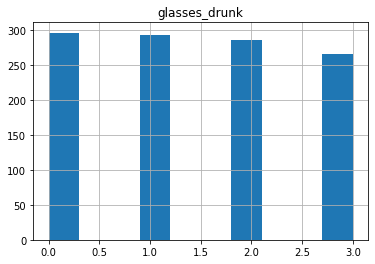

In [78]:
df.hist('glasses_drunk')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pickle



In [92]:
X = df.drop('glasses_drunk', axis=1)
y = df['glasses_drunk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [97]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=300, random_state=0)

rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))
confusion_matrix(y_test, rfc_predict)

Accuracy on training set: 1.000
Accuracy on test set: 0.912


array([[102,   4,   0,   0],
       [  6,  84,   4,   2],
       [  3,   1,  85,   2],
       [  0,   4,   7,  73]])

In [100]:
filename = 'random_forest_drunken_face_predictor.sav'
pickle.dump(rfc, open(filename, 'wb'))